# VAR

Using lag: 5
R² score for AQI: -2.9015


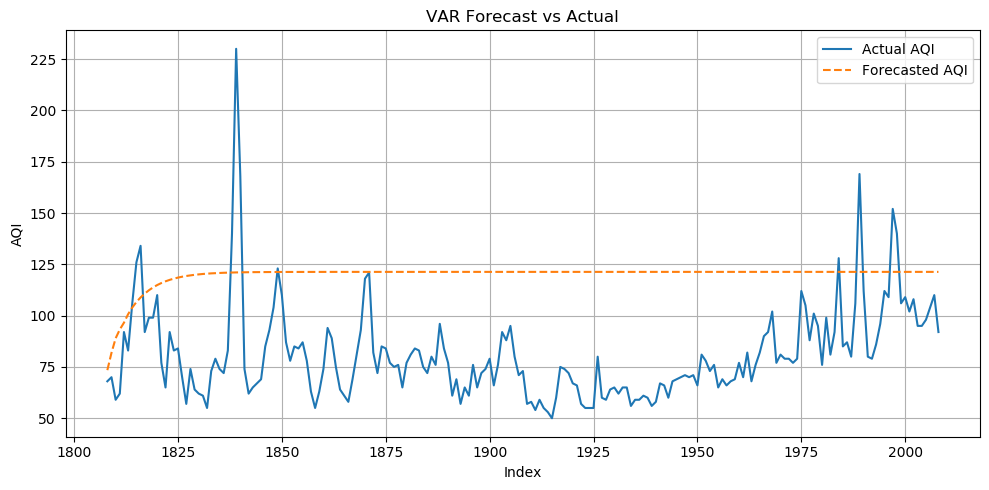

In [9]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Load and filter
df = pd.read_csv("Airmean_chennai.csv")
df = df[['AQI', 'PM2.5']]  # 🔁 Choose 2–3 relevant columns only
df = df.dropna()

# Split
train_size = int(len(df) * 0.9)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# VAR Model
try:
    model = VAR(train)
    lag_order = model.select_order(maxlags=5)
    best_lag = lag_order.aic
    if best_lag is None or best_lag == 0:
        best_lag = 1

    print(f"Using lag: {best_lag}")
    fitted = model.fit(best_lag)
    forecast = fitted.forecast(train.values, steps=len(test))

    forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

    # Evaluate
    r2 = r2_score(test['AQI'], forecast_df['AQI'])
    print(f"R² score for AQI: {r2:.4f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(test.index, test['AQI'], label="Actual AQI")
    plt.plot(test.index, forecast_df['AQI'], label="Forecasted AQI", linestyle='--')
    plt.title("VAR Forecast vs Actual")
    plt.xlabel("Index")
    plt.ylabel("AQI")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("VAR failed:", e)


Using best lag: 5


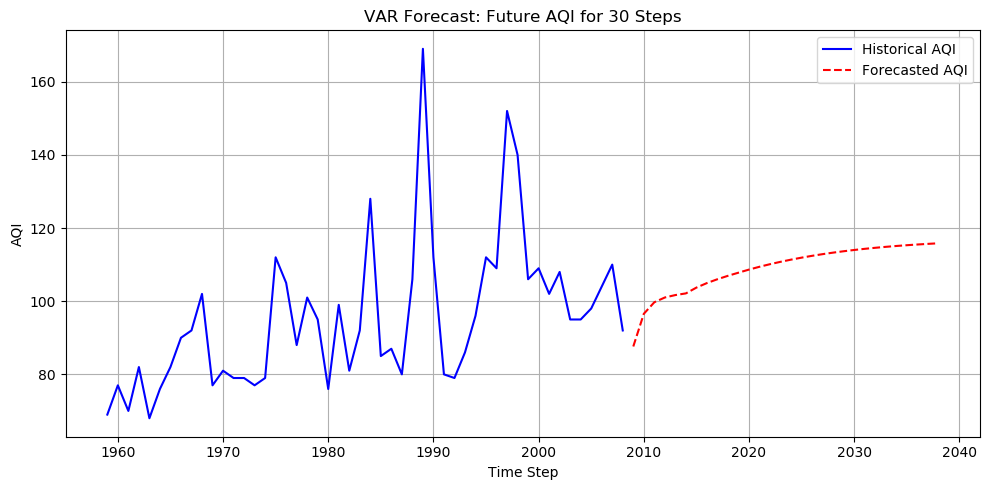

In [10]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load and prepare data
df = pd.read_csv("Airmean_chennai.csv")
df = df[['AQI', 'PM2.5']]
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# Train model on full data
model = VAR(df)

# Select best lag
selected_order = model.select_order(maxlags=5)
best_lag = selected_order.aic
if best_lag is None or best_lag == 0:
    best_lag = 1

print(f"Using best lag: {best_lag}")

fitted_model = model.fit(best_lag)

# Forecast next 30 time steps
n_forecast = 30
forecast = fitted_model.forecast(df.values[-best_lag:], steps=n_forecast)

# Create forecast DataFrame
forecast_df = pd.DataFrame(forecast, columns=df.columns)

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['AQI'].iloc[-50:], label="Historical AQI", color='blue')
plt.plot(range(len(df), len(df) + n_forecast), forecast_df['AQI'], label="Forecasted AQI", color='red', linestyle='--')
plt.title("VAR Forecast: Future AQI for 30 Steps")
plt.xlabel("Time Step")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# VARMAX

Model fitted with order=(1, 1)


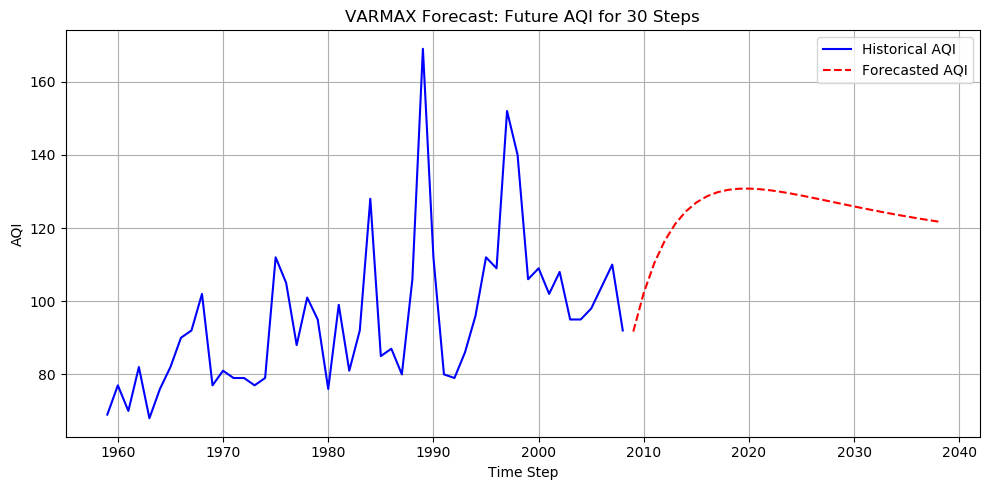

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load and clean data
df = pd.read_csv("Airmean_chennai.csv")
df = df[['AQI', 'PM2.5']]
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# Step 2: Fit VARMAX model on full data
order = (1, 1)  # (p, q)
model = VARMAX(df, order=order, trend='c')
model_fitted = model.fit(disp=False)
print(f"Model fitted with order={order}")

# Step 3: Forecast next 30 steps
n_forecast = 30
forecast = model_fitted.forecast(steps=n_forecast)
forecast.index = range(len(df), len(df) + n_forecast)

# Step 4: Plot forecast vs actual (AQI)
plt.figure(figsize=(10, 5))
plt.plot(df.index[-50:], df['AQI'].iloc[-50:], label="Historical AQI", color='blue')
plt.plot(forecast.index, forecast['AQI'], label="Forecasted AQI", color='red', linestyle='--')
plt.title("VARMAX Forecast: Future AQI for 30 Steps")
plt.xlabel("Time Step")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
